In [141]:
import numpy as np

def kmeans(dataToBeClustered, noOfClusters, iterations=100):
    n, m = dataToBeClustered.shape
    #centroids = dataToBeClustered[np.random.choice(n, noOfClusters, replace=False), :]
    centroids=[[-0.523 5 1],[ 0 2 1]]
    print(centroids)
    clusters = [[] for _ in range(noOfClusters)]
    for iteration in range(iterations):
        for i in range(n):
            distances = np.linalg.norm(dataToBeClustered[i, :] - centroids, axis=1)
            closest_centroid = np.argmin(distances)
            clusters[closest_centroid].append(i)
        for j in range(noOfClusters):
            if clusters[j]:
                centroids[j, :] = np.mean(dataToBeClustered[clusters[j], :], axis=0)
    return clusters, centroids



SyntaxError: invalid syntax (<ipython-input-141-912ba5e1964f>, line 6)

In [77]:
def calcDunnIndex(points, cluster):

    # points -- all data points
    # cluster -- cluster centroids

    
    numer = float('inf')
    for c in cluster: # for each cluster
        for t in cluster: # for each cluster
           # print(t, c)
            if (t == c).all(): continue # if same cluster, ignore
            ndis = findDistance(t, c)
            numer = numer if numer < ndis else ndis # find distance between centroids
            
    denom = 0
    for c in cluster: # for each cluster
        for p in points: # for each point
            for t in points: # for each point
                if (t == p).all(): continue # if same point, ignore
                ddis = findDistance(t, p)
            #    print('Denominator', denominator, ddis)
                denom = denom if denom > ddis else ddis
                
    return numer/denom


In [78]:
def findDistance(point1, point2):
    
    eucDis = 0
    for i in range(len(point1)):
        eucDis = eucDis + (point1[i] - point2[i])**2
 
    return eucDis**0.5 

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist
# Read the Flu dataset
df = pd.read_csv('flu_data.csv')
df.dropna(inplace=True)
colors = ['r','g','b','c','k','m','w','y',]
# Select the features for clustering
data = df[['Risk', 'NoFaceContact', 'Sick']].to_numpy()

# Apply k-means clustering with k = 2
clusters, centroids = kmeans(data,2,10)
di=calcDunnIndex(data,centroids)
print(di)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, cluster in enumerate(clusters):
    ax.scatter(data[cluster, 0], data[cluster, 1], data[cluster, 2], c=colors[i])
ax.set_xlabel('Risk')
ax.set_ylabel('NoFaceContact')
ax.set_zlabel('Sick')
plt.show()


[[-0.523, 5, 1], [0, 2, 1]]


TypeError: list indices must be integers or slices, not tuple

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
# Read the Flu dataset
df = pd.read_csv('flu_data.csv')
df.dropna(inplace=True)
colors = ['r','g','b','c','k','m','w','y',]
df=df.head(10)
# Select the features for clustering
data = df[['Risk', 'NoFaceContact', 'Sick']].to_numpy()

df2=pd.DataFrame(data,columns=['Risk', 'NoFaceContact', 'Sick'])
corr=df2.corr()


<AxesSubplot:>

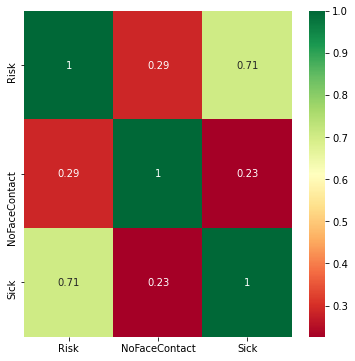

In [98]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr,cmap='RdYlGn',annot=True)

In [99]:
def fuzzy_cmeans(data, k, m, max_iter=100):
    """
    Fuzzy C-means clustering algorithm.
    
    Parameters:
    - data: numpy array with the data points (n x m)
    - k: number of clusters
    - m: fuzziness parameter
    - max_iter: maximum number of iterations
    
    Returns:
    - clusters: numpy array with the fuzzy membership of each point to each cluster (n x k)
    - centroids: numpy array with the k cluster centroids (k x m)
    """
    n, _ = data.shape
    # Initialize centroids randomly
    centroids = data[np.random.choice(n, k, replace=False), :]
    # Initialize fuzzy membership randomly
    membership = np.random.rand(n, k)
    membership /= np.sum(membership, axis=1, keepdims=True)
    for _ in range(max_iter):
        # Update centroids
        for j in range(k):
            centroids[j, :] = np.sum(membership[:, j, np.newaxis] * data, axis=0) / np.sum(membership[:, j])
        # Update fuzzy membership
        for i in range(n):
            distances = np.linalg.norm(data[i, :] - centroids, axis=1)
            for j in range(k):
                membership[i, j] = 1 / np.sum((distances / distances[j]) ** (2 / (m - 1)))
    return membership, centroids

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist
# Read the Flu dataset
df = pd.read_csv('flu_data.csv')
df.dropna(inplace=True)
colors = ['r','g','b','c','k','m','w','y',]

# Select the features for clustering
data = df[['Risk', 'NoFaceContact', 'Sick']].to_numpy()

# Apply k-means clustering with k = 2
memberships, centroids = fuzzy_cmeans(data,k=2,m=2,max_iter=10)
di=calcDunnIndex(data,centroids)
print(di)



0.04424904710208379


In [122]:
harden_assignment(memberships)

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [121]:
import numpy as np

def harden_assignment(fuzzy_membership_matrix):
    # convert the fuzzy membership values into hard assignments
    hard_assignments = np.argmax(fuzzy_membership_matrix, axis=1)
    return hard_assignments




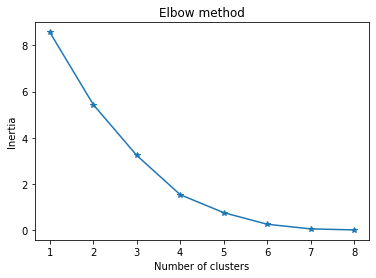

In [45]:
#finding K value
inertias = []

for i in range(1,9):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,9), inertias, marker='*')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()